In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

 # Data Preparation and Cleaning

In [3]:
# import csv dataset
employee=pd.read_csv('employee.csv')
employee

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,dept,salary
0,0.38,0.53,2.0,157.0,3.0,0.0,0.0,sales,low
1,0.80,0.86,5.0,262.0,6.0,0.0,0.0,sales,medium
2,0.11,0.88,7.0,272.0,4.0,0.0,0.0,sales,medium
3,0.72,0.87,5.0,223.0,5.0,0.0,0.0,sales,low
4,0.37,0.52,2.0,159.0,3.0,0.0,0.0,sales,low
...,...,...,...,...,...,...,...,...,...
15782,0.40,0.57,2.0,151.0,3.0,0.0,0.0,support,low
15783,0.37,0.48,2.0,160.0,3.0,0.0,0.0,support,low
15784,0.37,0.53,2.0,143.0,3.0,0.0,0.0,support,low
15785,0.11,0.96,6.0,280.0,4.0,0.0,0.0,support,low


In [4]:
# check data types
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15787 entries, 0 to 15786
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  float64
 3   average_montly_hours   14999 non-null  float64
 4   time_spend_company     14999 non-null  float64
 5   work_accident          14999 non-null  float64
 6   promotion_last_5years  14999 non-null  float64
 7   dept                   14999 non-null  object 
 8   salary                 14999 non-null  object 
dtypes: float64(7), object(2)
memory usage: 1.1+ MB


In [5]:
#describe numeric response variable
employee['satisfaction_level'].describe()

count    14999.000000
mean         0.612834
std          0.248631
min          0.090000
25%          0.440000
50%          0.640000
75%          0.820000
max          1.000000
Name: satisfaction_level, dtype: float64

In [6]:
#describe numeric predictors
employee[['last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']].describe()

,last_evaluation,number_project,average_montly_hours,time_spend_company
count,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.716102,3.803054,201.050337,3.498233
std,0.171169,1.232592,49.943099,1.460136
min,0.360000,2.000000,96.000000,2.000000
25%,0.560000,3.000000,156.000000,3.000000
50%,0.720000,4.000000,200.000000,3.000000
75%,0.870000,5.000000,245.000000,4.000000
max,1.000000,7.000000,310.000000,10.000000


In [7]:
#convert categorical predictors saved as numeric to categorical
employee['work_accident'] = employee['work_accident'].astype('category',copy=False)
employee['promotion_last_5years'] = employee['promotion_last_5years'].astype('category',copy=False)

#describe categorical predictors
employee[['work_accident', 'promotion_last_5years', 'dept', 'salary']].describe()

,work_accident,promotion_last_5years,dept,salary
count,14999.0,14999.0,14999,14999
unique,2.0,2.0,10,3
top,0.0,0.0,sales,low
freq,12830.0,14680.0,4140,7316


In [8]:
satisfaction = pd.DataFrame(employee['satisfaction_level'])
evaluation = pd.DataFrame(employee['last_evaluation'])
project = pd.DataFrame(employee['number_project'])
monthly_hours = pd.DataFrame(employee['average_montly_hours'])
time_spend = pd.DataFrame(employee['time_spend_company'])
work_accident = pd.DataFrame(employee['work_accident'])
promotion = pd.DataFrame(employee['promotion_last_5years'])
dept = pd.DataFrame(employee['dept'])
salary = pd.DataFrame(employee['salary'])

In [9]:
#finding the missing values  
missing_values = employee[employee.isna().any(axis=1)] 
display(missing_values.head()) 
display(missing_values.isna().count())

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,dept,salary
12783,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


satisfaction_level       788
last_evaluation          788
number_project           788
average_montly_hours     788
time_spend_company       788
work_accident            788
promotion_last_5years    788
dept                     788
salary                   788
dtype: int64

In [10]:
#remove rows with missing values
employee.dropna(inplace = True)

In [11]:
# check new number of rows
employee.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14999 entries, 0 to 15786
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   satisfaction_level     14999 non-null  float64 
 1   last_evaluation        14999 non-null  float64 
 2   number_project         14999 non-null  float64 
 3   average_montly_hours   14999 non-null  float64 
 4   time_spend_company     14999 non-null  float64 
 5   work_accident          14999 non-null  category
 6   promotion_last_5years  14999 non-null  category
 7   dept                   14999 non-null  object  
 8   salary                 14999 non-null  object  
dtypes: category(2), float64(5), object(2)
memory usage: 967.0+ KB


<Axes: >

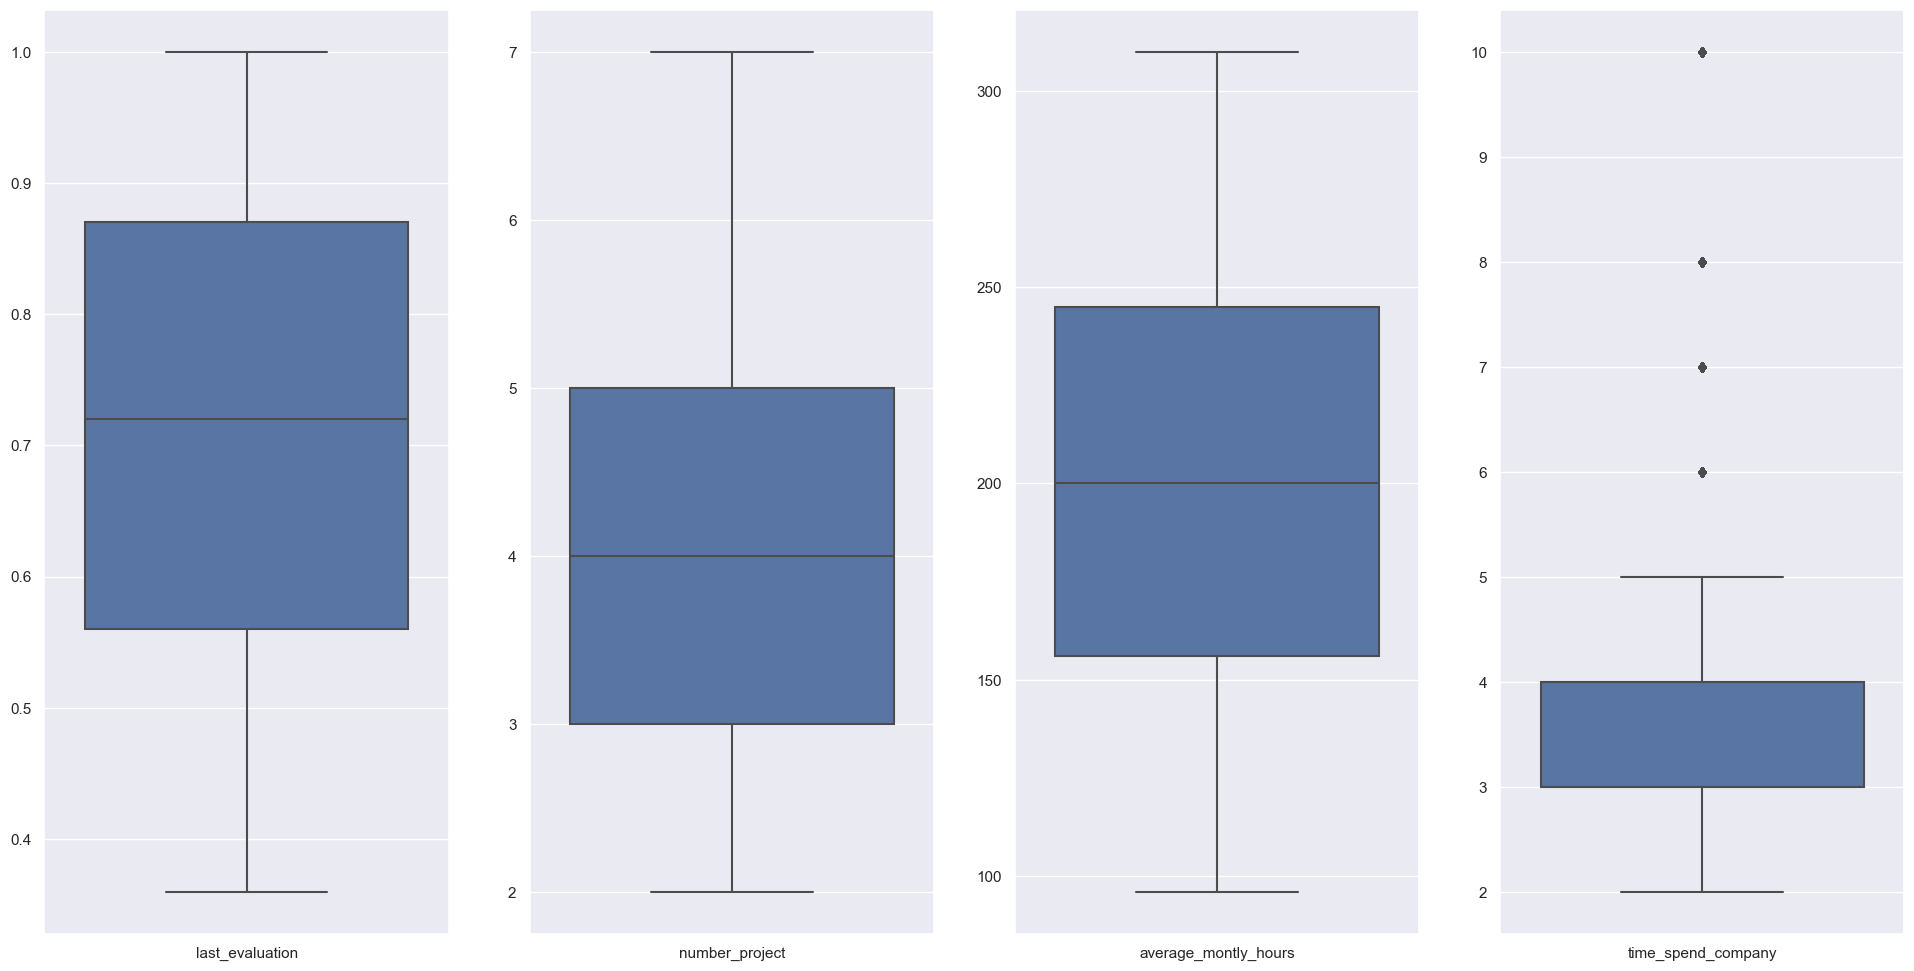

In [12]:
#Boxplot of numeric predictors to see outliers

f, axes = plt.subplots(1, 4, figsize=(24, 12))
sb.boxplot(data = evaluation, orient = "v", ax = axes[0])
sb.boxplot(data = project, orient = "v", ax = axes[1])
sb.boxplot(data = monthly_hours, orient = "v", ax = axes[2])
sb.boxplot(data = time_spend, orient = "v", ax = axes[3])

In [13]:
# define function to find outliers
def find_outliers_IQR(df):

    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    iqr=q3-q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = [x for x in df if x <= lower_bound or x >= upper_bound]
    return outliers

In [14]:
find_outliers_IQR(employee['last_evaluation'])

[]

In [15]:
find_outliers_IQR(employee['number_project'])

[]

In [16]:
find_outliers_IQR(employee['average_montly_hours'])

[]

In [17]:
find_outliers_IQR(employee['time_spend_company'])

[6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0

In [18]:
#no. of outliers
len(find_outliers_IQR(employee['time_spend_company']))

1282

In [19]:
#remove outliers
print("Before: ", employee.shape)
for x in find_outliers_IQR(employee['time_spend_company']):
    index = employee[employee['time_spend_company'] == x].index
    employee = employee.drop(index)
print("After: ", employee.shape)

Before:  (14999, 9)
After:  (13717, 9)


# Exploratory Data Analysis and Visualisation

<Axes: >

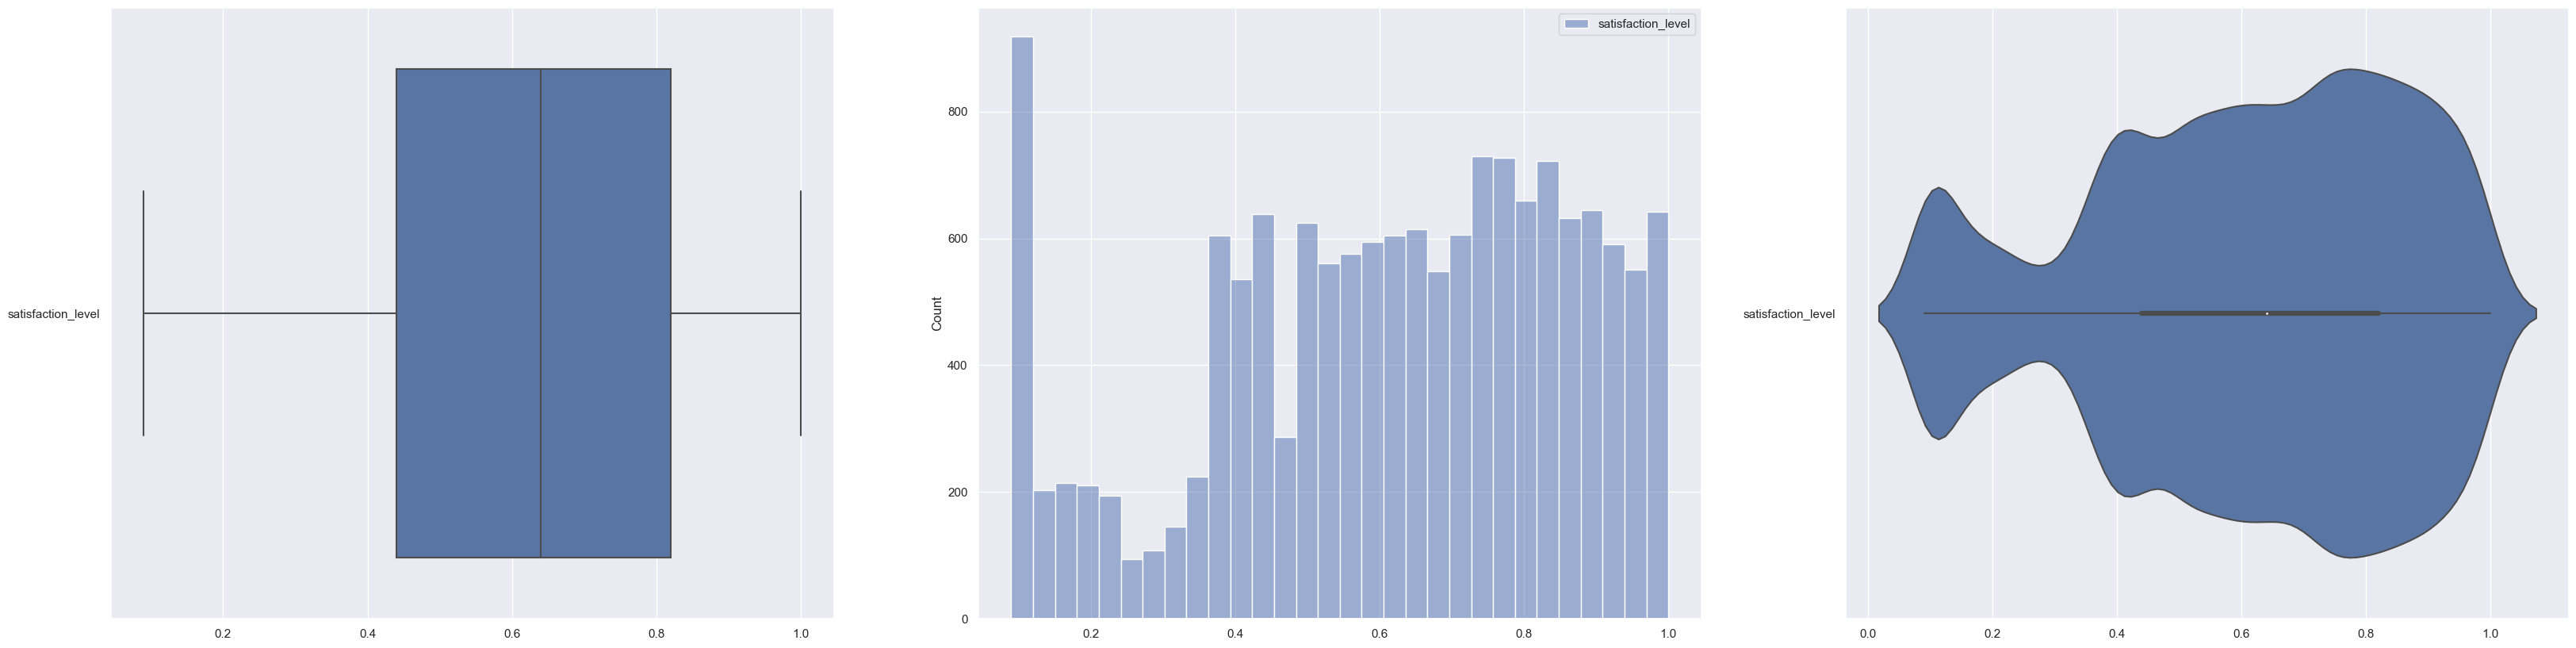

In [20]:
f, axes = plt.subplots(1, 3, figsize=(40,10))

#Boxplot
sb.boxplot(data = satisfaction, orient = "h", ax = axes[0])

#Histplot
sb.histplot(data = satisfaction, ax = axes[1])

#Violinplot
sb.violinplot(data = satisfaction, orient = "h", ax = axes[2])

In [21]:
# Create a joint dataframe by concatenating evaluation (numeric predictor) and satisfaction (response)
jointDF_eval = pd.concat([evaluation, satisfaction], axis = 1)

# Print correlation matrix
print(jointDF_eval.corr())
print()

# Create a joint dataframe by concatenating project (numeric predictor) and satisfaction (response)
jointDF_proj = pd.concat([project, satisfaction], axis = 1)

# Print correlation matrix
print(jointDF_proj.corr())
print()

# Create a joint dataframe by concatenating monthly hours (numeric predictor) and satisfaction (response)
jointDF_hours = pd.concat([monthly_hours, satisfaction], axis = 1)

# Print correlation matrix
print(jointDF_hours.corr())
print()

# Create a joint dataframe by concatenating time_spend (numeric predictor) and satisfaction (response)
jointDF_time = pd.concat([time_spend, satisfaction], axis = 1)

# Print correlation matrix
print(jointDF_time.corr())
print()

                    last_evaluation  satisfaction_level
last_evaluation            1.000000            0.105021
satisfaction_level         0.105021            1.000000

                    number_project  satisfaction_level
number_project             1.00000            -0.14297
satisfaction_level        -0.14297             1.00000

                      average_montly_hours  satisfaction_level
average_montly_hours              1.000000           -0.020048
satisfaction_level               -0.020048            1.000000

                    time_spend_company  satisfaction_level
time_spend_company            1.000000           -0.100866
satisfaction_level           -0.100866            1.000000



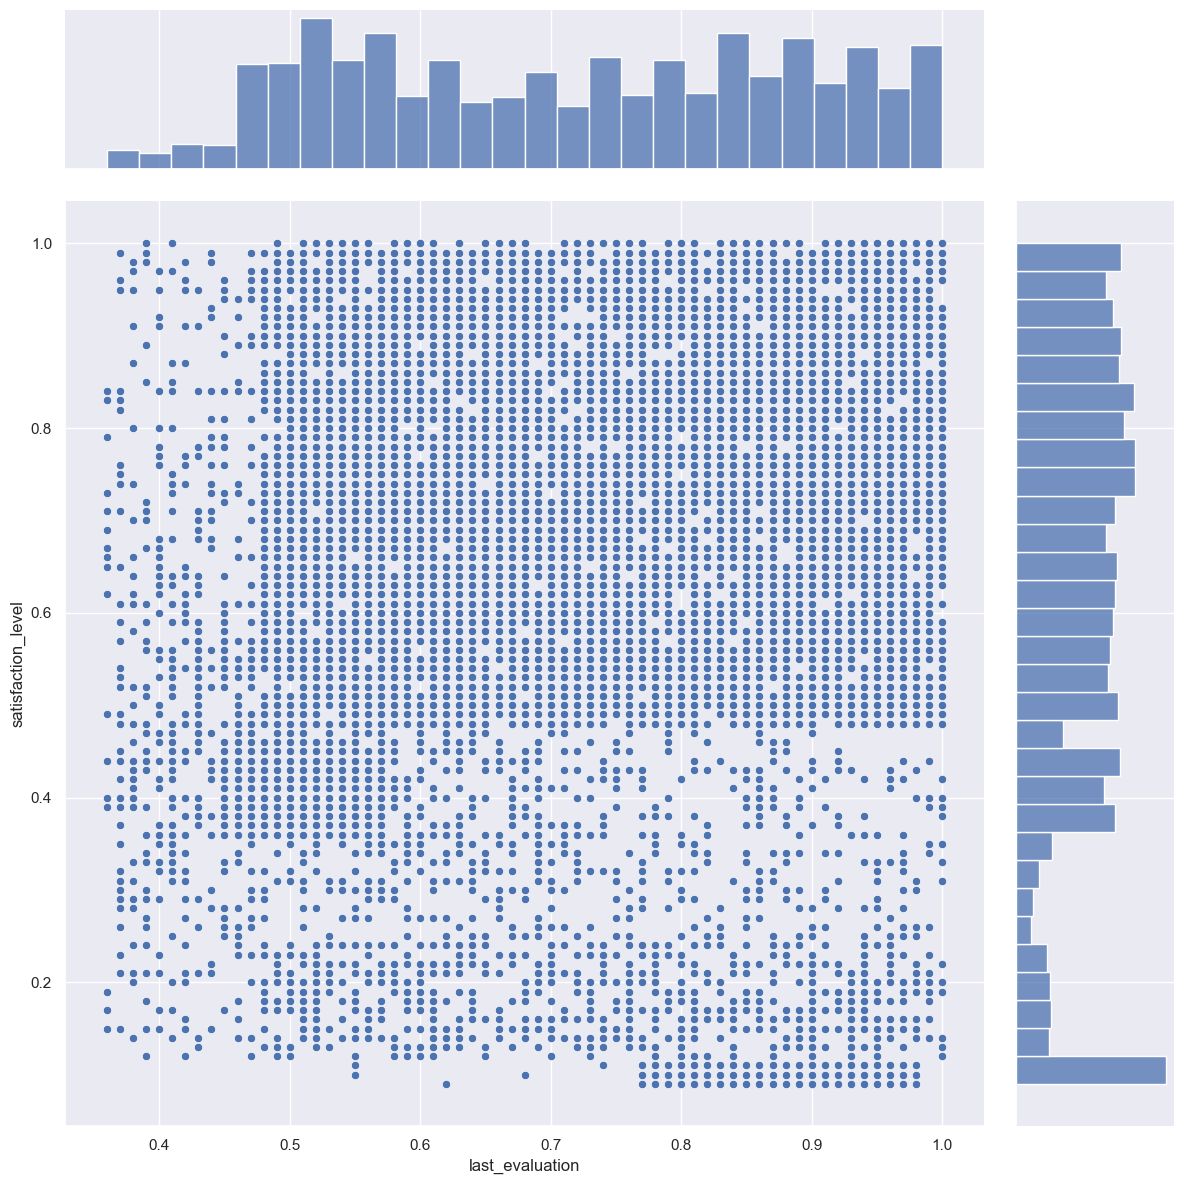

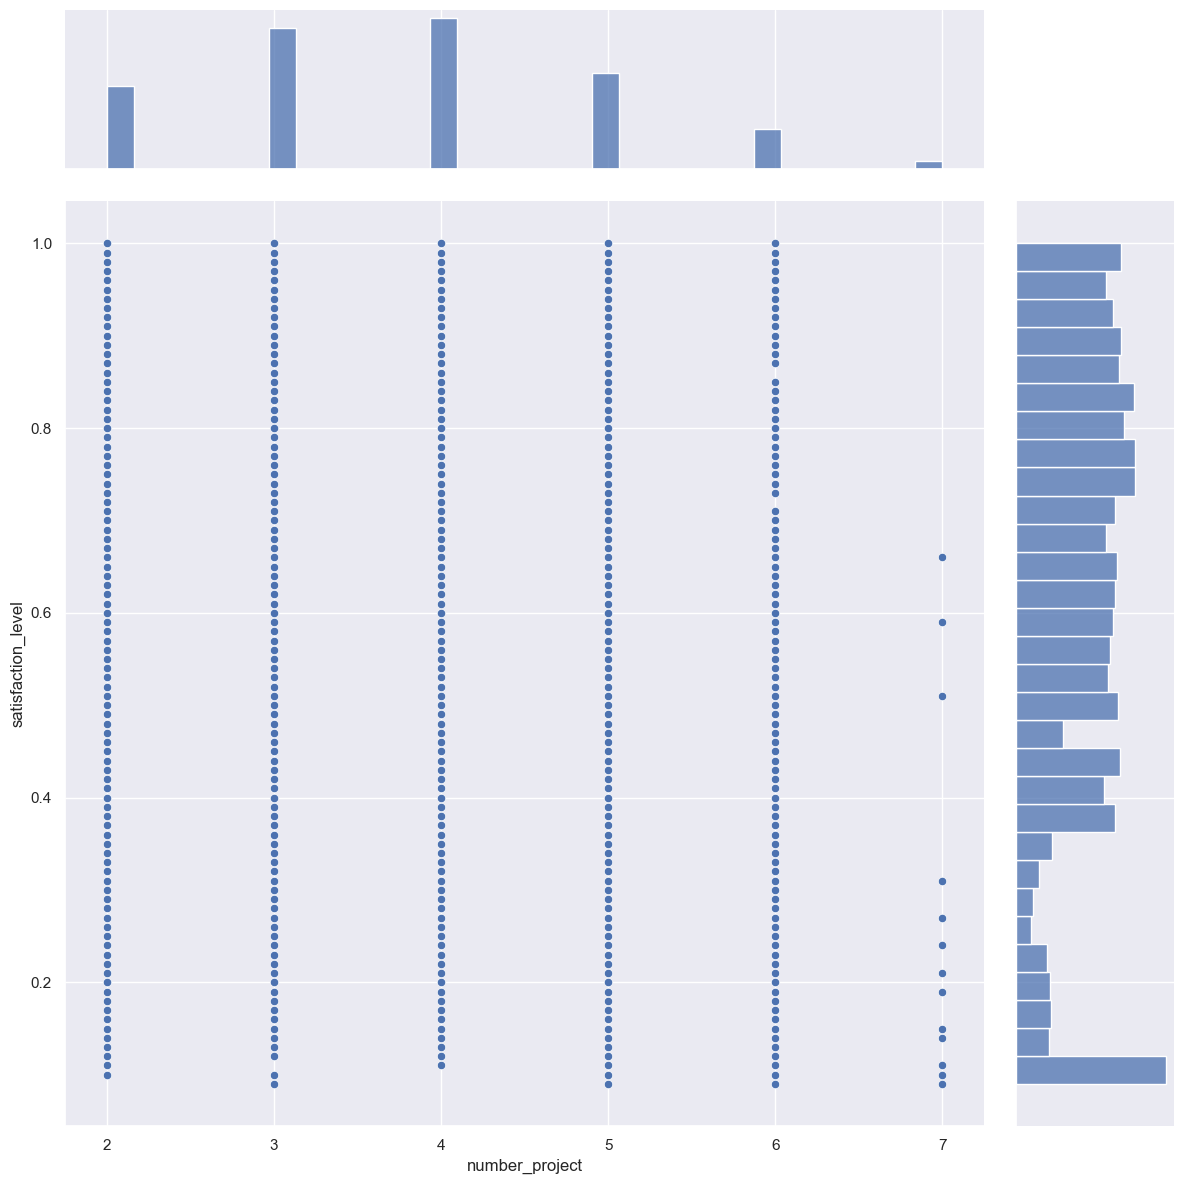

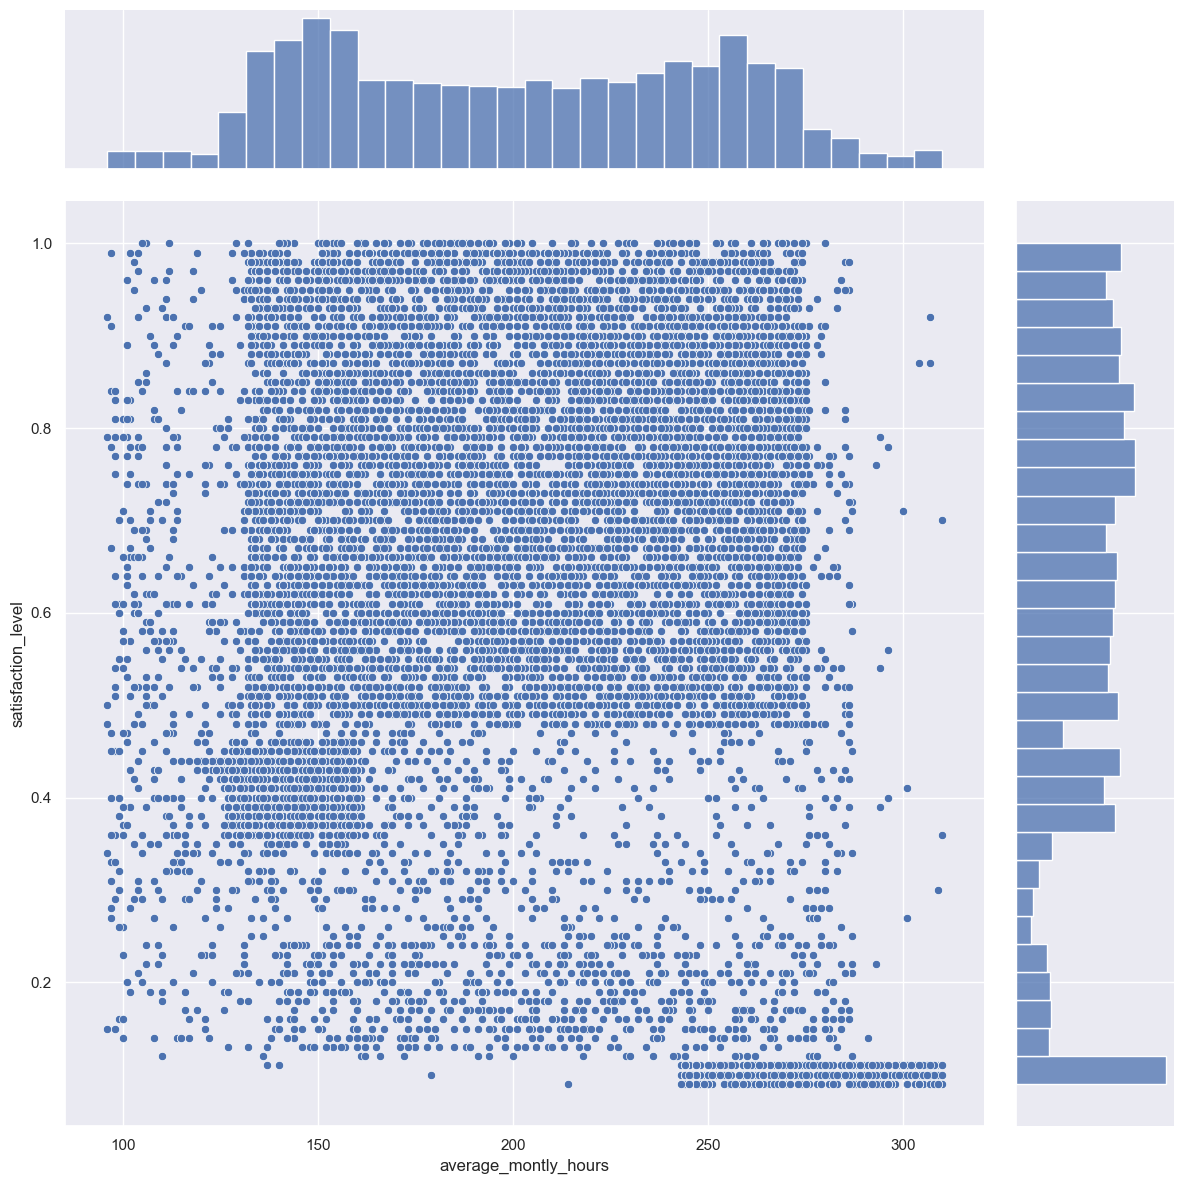

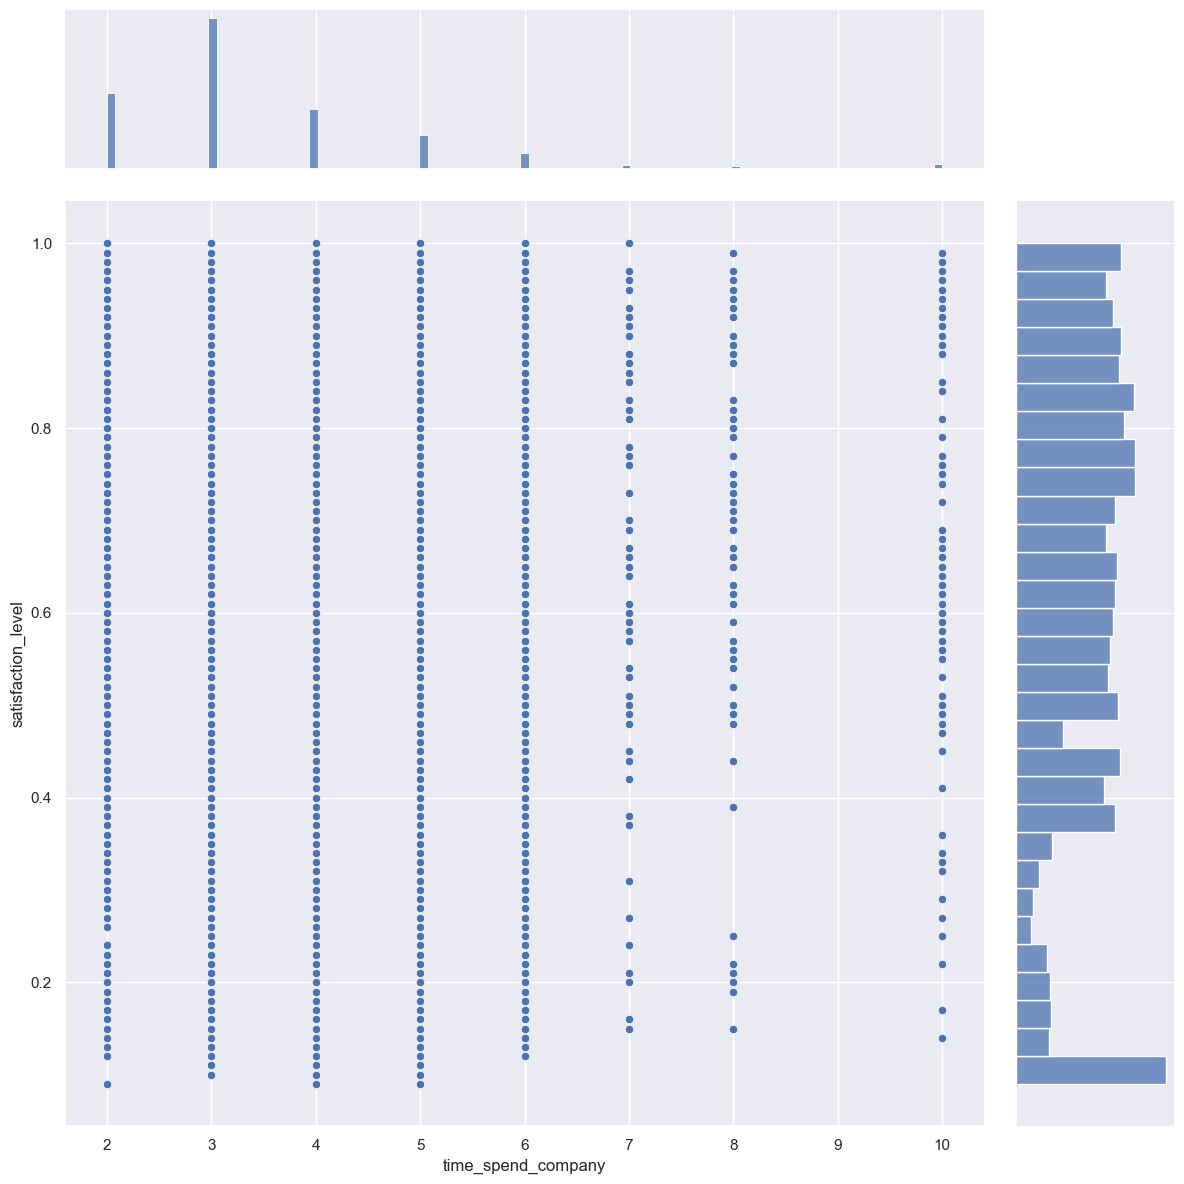

In [22]:
# Draw jointplot for each pair of numeric predictor and response
sb.jointplot(data = jointDF_eval, x = "last_evaluation", y = "satisfaction_level", height = 12)

sb.jointplot(data = jointDF_proj, x = "number_project", y = "satisfaction_level", height = 12)

sb.jointplot(data = jointDF_hours, x = "average_montly_hours", y = "satisfaction_level", height = 12)

sb.jointplot(data = jointDF_time, x = "time_spend_company", y = "satisfaction_level", height = 12)

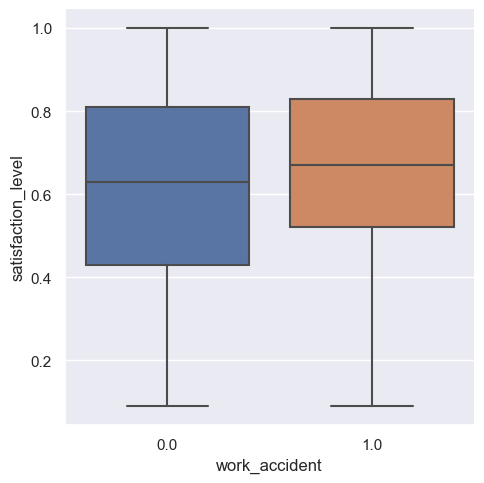

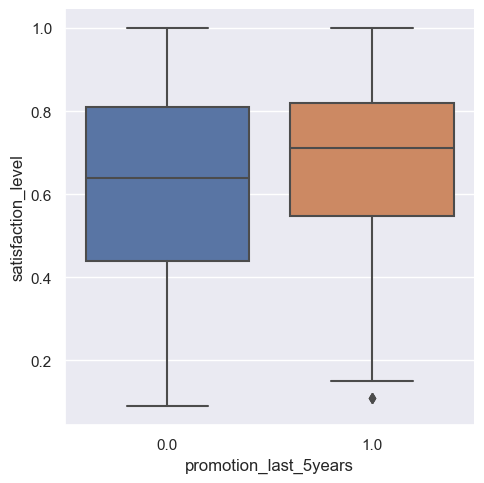

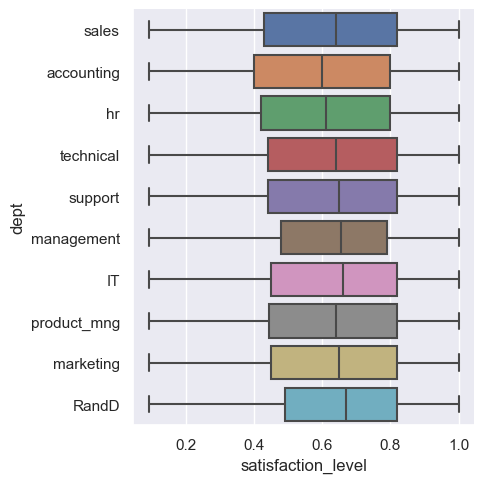

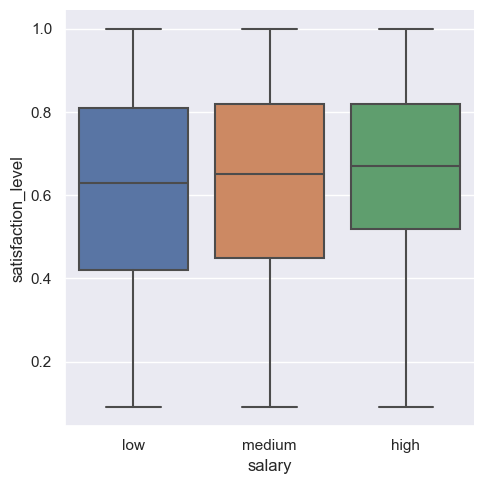

In [23]:
#plot categorical variable (work accident) against numeric response variable (satisfaction)
sb.catplot(x="work_accident", y="satisfaction_level", kind="box", data=employee)

#plot categorical variable (promotion) against numeric response variable (satisfaction)
sb.catplot(x="promotion_last_5years", y="satisfaction_level", kind="box", data=employee)

#plot categorical variable (department) against numeric response variable (satisfaction)
sb.catplot(x="satisfaction_level", y="dept", kind="box", data=employee)

#plot categorical variable (salary) against numeric response variable (satisfaction)
sb.catplot(x="salary", y="satisfaction_level", kind="box", data=employee)

# Random Forest Regression

In [24]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13717 entries, 0 to 15786
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   satisfaction_level     13717 non-null  float64 
 1   last_evaluation        13717 non-null  float64 
 2   number_project         13717 non-null  float64 
 3   average_montly_hours   13717 non-null  float64 
 4   time_spend_company     13717 non-null  float64 
 5   work_accident          13717 non-null  category
 6   promotion_last_5years  13717 non-null  category
 7   dept                   13717 non-null  object  
 8   salary                 13717 non-null  object  
dtypes: category(2), float64(5), object(2)
memory usage: 884.3+ KB


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

# Define predictors and the response
X = employee.drop('satisfaction_level', axis=1)  # Drop the response variable column
y = employee['satisfaction_level']  # Response variable

# Identify categorical and numeric columns
categorical_cols = ['work_accident', 'promotion_last_5years', 'dept', 'salary']
numeric_cols = ['last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']

print("DataFrame Columns:", categorical_cols, numeric_cols)



DataFrame Columns: ['work_accident', 'promotion_last_5years', 'dept', 'salary'] ['last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']


In [66]:
# Create a ColumnTransformer to apply different preprocessing to categorical and numeric data
preprocessor_rf = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),  # Apply standard scaling to numeric columns
        ('cat', OneHotEncoder(), categorical_cols)  # Apply one-hot encoding to categorical columns
    ])

# Create a pipeline that uses the preprocessor and a random forest regressor
model_rf = Pipeline([
    ('preprocessor', preprocessor_rf),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Split the data into training and testing sets
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model on the training data
model_rf.fit(X_train_rf, y_train_rf)

# Make predictions on the test data
y_pred_rf = model_rf.predict(X_test_rf)

# Evaluate the model
print("Mean Squared Error:", mean_squared_error(y_test_rf, y_pred_rf))

print("R-squared:", r2_score(y_test_rf, y_pred_rf))

print("Explained Variance:", r2_score(y_test_rf, y_pred_rf))

print(y_pred_rf)

Mean Squared Error: 0.029194827625298205
R-squared: 0.5285320654078028
Explained Variance: 0.5285320654078028
[0.5178 0.7074 0.7228 ... 0.6744 0.6773 0.3183]


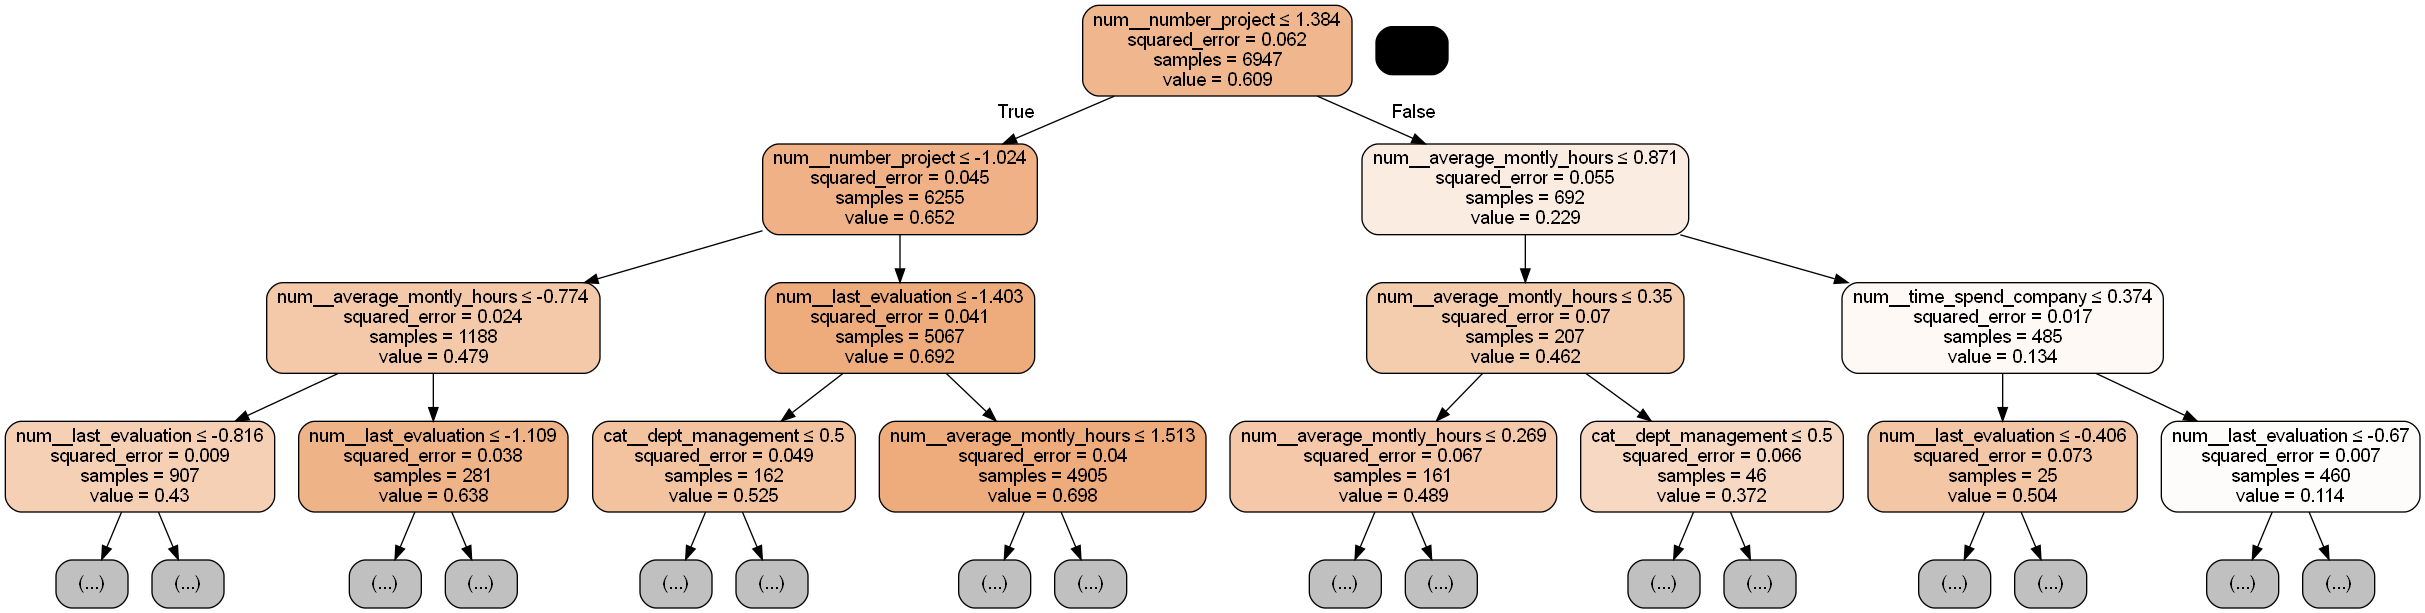

In [46]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

model_RF = model_rf.named_steps['regressor']

# Get feature names from the transformer in the pipeline
transformer = model_rf.named_steps['preprocessor']
feature_names_transformed = transformer.get_feature_names_out()

# Extract single tree
estimator = model_RF.estimators_[0] 

# Export as dot file
dot_data = export_graphviz(estimator, out_file=None, max_depth = 3,
                           feature_names=feature_names_transformed,
                           filled=True, rounded=True, special_characters=True)

# Use pydotplus to convert to PNG
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())


<Figure size 1000x600 with 0 Axes>

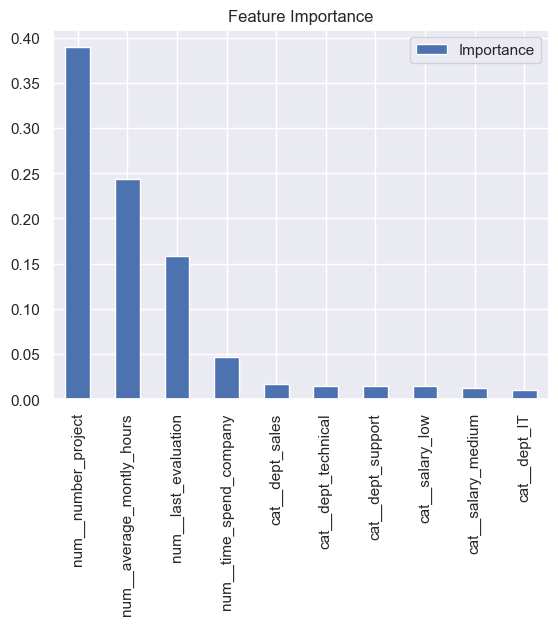

In [47]:
importances = model_RF.feature_importances_

feature_importances = pd.DataFrame(importances, index=feature_names_transformed, columns=['Importance'])
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)

# Plot ranking of feature importance
plt.figure(figsize=(10, 6))
feature_importances.head(10).plot(kind='bar')
plt.title('Feature Importance')
plt.show()

# Gradient Boosting Regression

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

# Define predictors and the response
X = employee.drop('satisfaction_level', axis=1)
y = employee['satisfaction_level']

# Splitting the data into training and testing sets
X_train_gb, X_test_gb, y_train_gb, y_test_gb = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing: OneHotEncoder for categorical features and StandardScaler for numeric features
numeric_features = ['last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']
numeric_transformer = StandardScaler()

categorical_features = ['work_accident', 'promotion_last_5years', 'dept', 'salary']
categorical_transformer = OneHotEncoder()

preprocessor_gb = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a pipeline that applies the preprocessor and then fits a gradient boosting model
model_gb = Pipeline(steps=[
    ('preprocessor', preprocessor_gb),
    ('regressor', GradientBoostingRegressor(n_estimators=100, max_depth = 7, learning_rate=0.1, min_samples_split = 6, min_samples_leaf = 1, random_state=42))
])

# Train the model
model_gb.fit(X_train_gb, y_train_gb)

# Make predictions
y_pred_gb = model_gb.predict(X_test_gb)

# Evaluate the model
print("Mean Squared Error:", mean_squared_error(y_test_gb, y_pred_gb))

print("R-squared:", r2_score(y_test_gb, y_pred_gb))

print("Explained Variance:", r2_score(y_test_gb, y_pred_gb))

print(y_pred_gb)

Mean Squared Error: 0.030439995292761278
R-squared: 0.5084238244572348
Explained Variance: 0.5084238244572348
[0.52377801 0.72503941 0.7016949  ... 0.69709303 0.65134962 0.33740402]


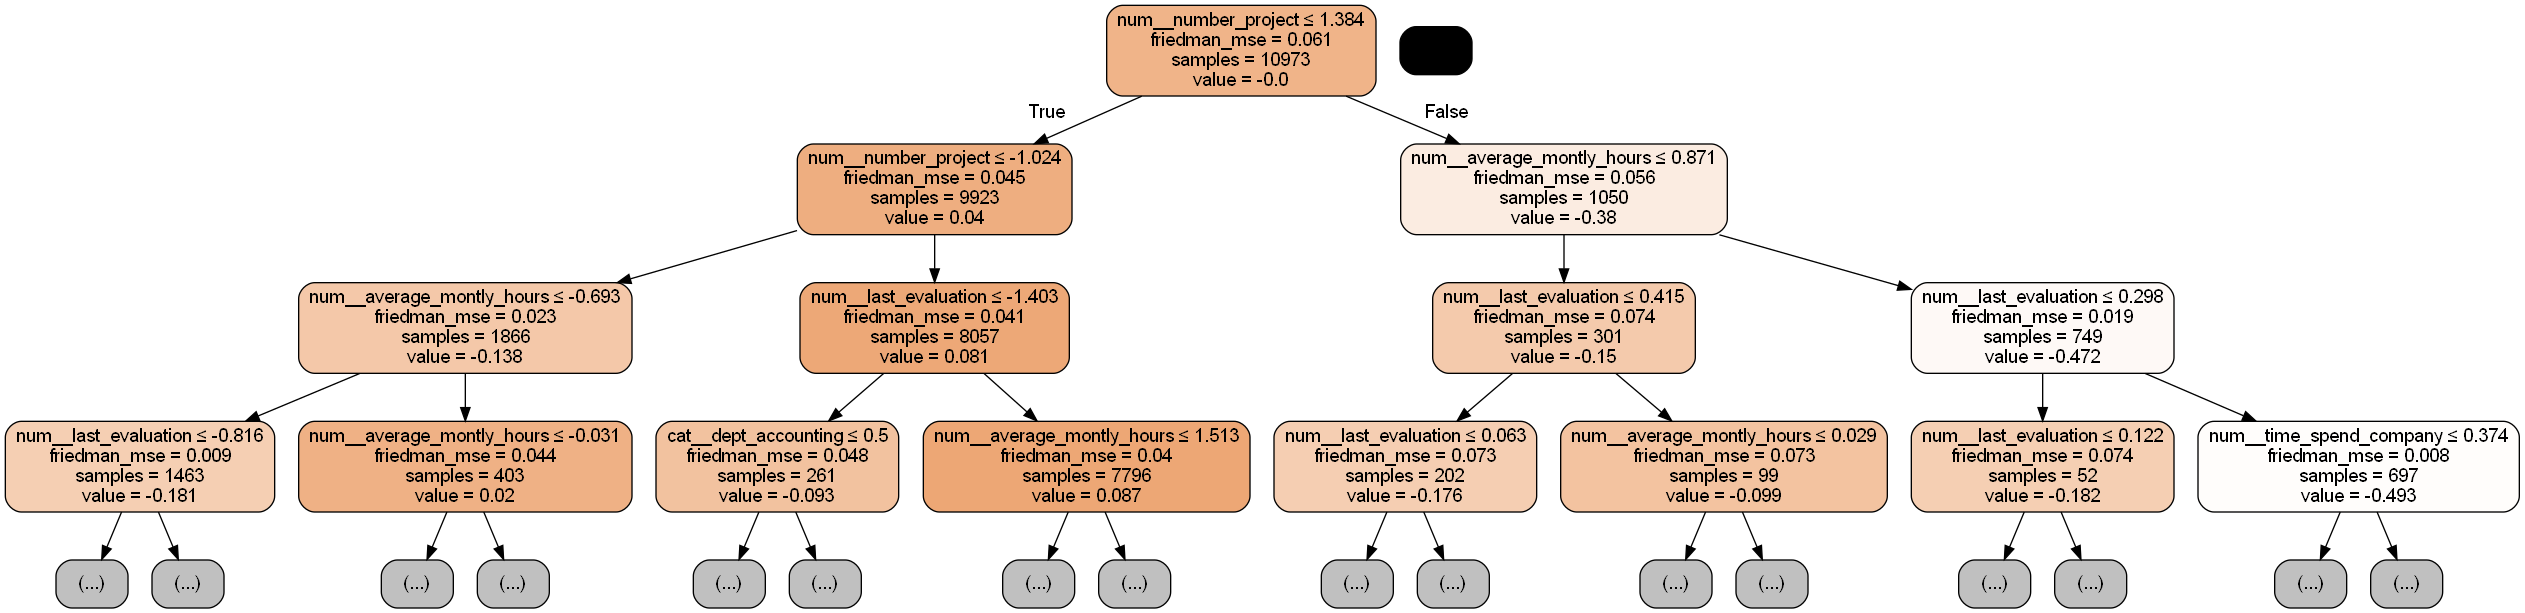

In [105]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

model_GB = model_gb.named_steps['regressor']

# Get feature names from the transformer in the pipeline
transformer = model_gb.named_steps['preprocessor']
feature_names_transformed = transformer.get_feature_names_out()

# Extract single tree
estimator = model_GB.estimators_[0, 0]  # The first tree of the first stage

# Export as dot file
dot_data = export_graphviz(estimator, out_file=None, max_depth = 3 
                           feature_names=feature_names_transformed,
                           filled=True, rounded=True, special_characters=True)

# Use pydotplus to convert to PNG
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())


<Figure size 1000x600 with 0 Axes>

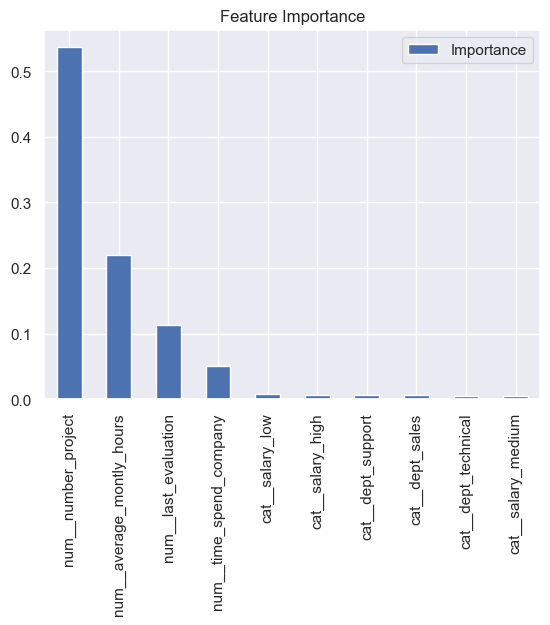

In [109]:
importances = model_GB.feature_importances_

feature_importances = pd.DataFrame(importances, index=feature_names_transformed, columns=['Importance'])
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)

# Plot ranking of feature importance
plt.figure(figsize=(10, 6))
feature_importances.head(10).plot(kind='bar')
plt.title('Feature Importance')
plt.show()